# Определение перспективного тарифа для телеком компании

Мы аналитики компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

# План выполнения работ
### [Шаг 1. Откройте файл с данными и изучите общую информацию. ](#step1)
### [Шаг 2. Подготовка данных](#step2)
### [Шаг 3. Проанализируйте данные](#step3)
### [Шаг 4. Проверка гипотез](#step4)



## <a id="step1">Шаг 1. Откройте файл с данными и изучите общую информацию </a>

### Импортируем библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings 
import seaborn as sns
from scipy import stats as st
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', 500)

### Посмотрим на файлы

#### Прочитаем методом read_csv файлы

In [2]:
calls_data = pd.read_csv('/Users/vladimrogulo/PycharmProjects/Praktikum3/calls.csv')
internet_data = pd.read_csv('/Users/vladimrogulo/PycharmProjects/Praktikum3/internet.csv')
messages_data = pd.read_csv('/Users/vladimrogulo/PycharmProjects/Praktikum3/messages.csv')
tariffs_data = pd.read_csv('/Users/vladimrogulo/PycharmProjects/Praktikum3/tariffs.csv')
users_data = pd.read_csv('/Users/vladimrogulo/PycharmProjects/Praktikum3/users.csv')
#calls_data = pd.read_csv('/datasets/calls.csv')
#internet_data = pd.read_csv('/datasets/internet.csv')
#messages_data = pd.read_csv('/datasets/messages.csv')
#tariffs_data = pd.read_csv('/datasets//datasets/tariffs.csv')
#users_data = pd.read_csv('/datasets/users.csv')

#####  Рассмотрим файл calls

In [3]:
print('\nРассмотрим общую информацию')
calls_data.info()
print('\nРассмотрим первые 5 строк')
display(calls_data.head())
print('\nРассмотрим описательную статистику нашего DataFrame')
calls_data.describe()


Рассмотрим общую информацию
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB

Рассмотрим первые 5 строк


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000



Рассмотрим описательную статистику нашего DataFrame


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


##### Описание полей calls
Таблица `calls` (информация о звонках):

`id` — уникальный номер звонка

`call_date` — дата звонка

`duration` — длительность звонка в минутах

`user_id`  — идентификатор пользователя, сделавшего звонок

#####  Рассмотрим файл internet

In [4]:
print('\nРассмотрим общую информацию')
internet_data.info()
print('\nРассмотрим первые 5 строк')
display(internet_data.head())
print('\nРассмотрим описательную статистику нашего DataFrame')
internet_data.describe()


Рассмотрим общую информацию
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB

Рассмотрим первые 5 строк


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000



Рассмотрим описательную статистику нашего DataFrame


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


##### Описание полей internet
Таблица `internet` (информация об интернет-сессиях):

`id` — уникальный номер сессии

`mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)

`session_date` — дата интернет-сессии

`user_id` — идентификатор пользователя



Видим столбец `Unnamed: 0`, который дублирует индексы. Обрабатывать его не будем, так как в последующей группировке он не будет использоваться	

#####  Рассмотрим файл messages

In [5]:
print('\nРассмотрим общую информацию')
messages_data.info()
print('\nРассмотрим первые 5 строк')
display(messages_data.head())
print('\nРассмотрим описательную статистику нашего DataFrame')
messages_data.describe()


Рассмотрим общую информацию
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB

Рассмотрим первые 5 строк


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000



Рассмотрим описательную статистику нашего DataFrame


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


##### Описание полей messages
Таблица `messages` (информация о сообщениях):

`id` — уникальный номер сообщения

`message_date` — дата сообщения

`user_id` — идентификатор пользователя, отправившего сообщение

#####  Рассмотрим файл users

In [6]:
print('\nРассмотрим общую информацию')
users_data.info()
print('\nРассмотрим первые 5 строк')
display(users_data.head())
print('\nРассмотрим описательную статистику нашего DataFrame')
users_data.describe()


Рассмотрим общую информацию
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB

Рассмотрим первые 5 строк


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra



Рассмотрим описательную статистику нашего DataFrame


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


##### Описание полей users
Таблица `users` (информация о пользователях):

`user_id` — уникальный идентификатор пользователя

`first_name` — имя пользователя

`last_name` — фамилия пользователя

`age` — возраст пользователя (годы)

`reg_date` — дата подключения тарифа (день, месяц, год)

`churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)

`city` — город проживания пользователя

`tariff` — название тарифного плана

#####  Рассмотрим файл tariffs

In [7]:
print('\nРассмотрим общую информацию')
tariffs_data.info()
print('\nРассмотрим строки')
display(tariffs_data.head())
print('\nРассмотрим описательную статистику нашего DataFrame')
tariffs_data.describe()


Рассмотрим общую информацию
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes

Рассмотрим строки


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra



Рассмотрим описательную статистику нашего DataFrame


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


##### Описание полей tariffs
Таблица `tariffs` (информация о тарифах):

`tariff_name` — название тарифа

`rub_monthly_fee` — ежемесячная абонентская плата в рублях

`minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату

`messages_included` — количество сообщений в месяц, включённых в абонентскую плату

`mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)

`rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)

`rub_per_message` — стоимость отправки сообщения сверх тарифного пакета

`rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

### Вывод
Рассмотрев полученные данные, заметим, что имеются пропуски в таблице `users` в столбце `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных).
Учтем пользователей, которые прекратили пользоваться тарифом.

`mb_used`(кол-во Мб) `duration`(кол-во минут) требуется округлить в большую сторону и поменять тип данных на int.

Требуется перевести имеющиеся даты к формату даты

## <a id="step2">Шаг 2. Подготовка данных </a>

#### Рассмотрим нулевые значения в данных calls_data и internet_data

In [8]:
print('Количество нулевых значений в calls_data:',
      calls_data[calls_data['duration'] == 0]['id'].count(), 'из', calls_data['id'].count())
print('Количество нулевых значений в internet_data:',
      internet_data[internet_data['mb_used'] == 0]['id'].count(), 'из', internet_data['id'].count())
# Так как у мы работаем с хитрыми тарифными планами, то такие нулевые знаяения примем за короткие сеансы
# Заменим данные значения на 1
calls_data['duration'].replace(0.0,1,inplace = True)
internet_data['mb_used'].replace(0.0,1,inplace = True)

Количество нулевых значений в calls_data: 39613 из 202607
Количество нулевых значений в internet_data: 19598 из 149396


#### Приведем столбец city в users_data к нижнему регистру

In [9]:
users_data['city'] = users_data['city'].str.lower()
print(users_data['city'].value_counts())

москва             99
санкт-петербург    39
новосибирск        16
казань             14
омск               14
                   ..
нижневартовск       1
иваново             1
архангельск         1
химки               1
подольск            1
Name: city, Length: 76, dtype: int64


#### Округли значения calls_data и internet_data

In [10]:
calls_data['duration'] = np.ceil(calls_data['duration'])
internet_data['mb_used'] = np.ceil(internet_data['mb_used'])
display(internet_data.head())
display(calls_data.head())

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,113.0,2018-11-25,1000
1,1,1000_1,1053.0,2018-09-07,1000
2,2,1000_2,1198.0,2018-06-25,1000
3,3,1000_3,551.0,2018-08-22,1000
4,4,1000_4,303.0,2018-09-24,1000


,id,call_date,duration,user_id
0,1000_0,2018-07-25,1.0,1000
1,1000_1,2018-08-17,1.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000


#### Заменим формат данных

In [11]:
# Замена формата данных для calls_data
calls_data['duration'] = calls_data['duration'].astype(int)
calls_data['call_date'] = pd.to_datetime(calls_data['call_date'], format='%Y-%m-%d')
# Замена формата данных для internet_data
internet_data['mb_used'] = internet_data['mb_used'].astype(int)
internet_data['session_date'] = pd.to_datetime(internet_data['session_date'], format='%Y-%m-%d')
# Замена формата данных для users_data
users_data['reg_date'] = pd.to_datetime(users_data['reg_date'], format='%Y-%m-%d')
users_data['churn_date'] = pd.to_datetime(users_data['churn_date'], format='%Y-%m-%d')
# Замена формата данных для messages_data
messages_data['message_date'] = pd.to_datetime(messages_data['message_date'], format='%Y-%m-%d')

#### Выделим с даты месяцы с каждой таблицы

In [12]:
calls_data['month'] = calls_data['call_date'].dt.month
internet_data['month'] = internet_data['session_date'].dt.month
users_data['reg_month'] = users_data['reg_date'].dt.month
messages_data['month'] = messages_data['message_date'].dt.month




#### Объединим таблицы и посмотрим

In [13]:
# Для того, чтобы объединить методом merge исходные таблицы, заменим в tariffs_data 
# название колонки tariff_name на tariff
tariffs_data.columns = ['messages_included', 'mb_per_month_included', 'minutes_included', 'rub_monthly_fee',
                       'rub_per_gb', 'rub_per_message', 'rub_per_minute', 'tariff']

# Сведем таблицу для звонков
users_calls = calls_data.merge(users_data, how='left')
# Сведем таблицу для интернета
users_internet = internet_data.merge(users_data, how='left')
# Сведем таблицу для сообщений
users_messages = messages_data.merge(users_data, how='left')


#### Количество сделанных звонков и израсходованных минут разговора по месяцам для каждого пользователя

In [14]:
# Общая сводная таблица
#display(db_calls.pivot_table(index='user_id', columns = 'call_month', aggfunc={'duration':'sum', 'id':'count'}))
# Отдельные таблицы
print('Израсходованных минут разговора для каждого пользователя за месяц')
db_calls_piv = users_calls.pivot_table(index =['user_id', 'city', 'tariff','month'], aggfunc={'duration':'sum','id':'count'}).reset_index()
db_calls_piv.columns = ['user_id', 'city', 'tariff', 'month', 'duration','call_count']
display(db_calls_piv.shape)



Израсходованных минут разговора для каждого пользователя за месяц


(3174, 6)

#### Количество отправленных сообщений по месяцам для каждого пользователя

In [15]:
print('Количество отправленных сообщений для каждого пользователя за месяц')
db_messages_piv = users_messages.pivot_table(index=['user_id','city', 'tariff','month'], aggfunc={'id':'count'}).reset_index()
db_messages_piv.columns = ['user_id', 'city', 'tariff', 'month', 'message_count']
display(db_messages_piv.head())



Количество отправленных сообщений для каждого пользователя за месяц


,user_id,city,tariff,month,message_count
0,1000,краснодар,ultra,5,22
1,1000,краснодар,ultra,6,60
2,1000,краснодар,ultra,7,75
3,1000,краснодар,ultra,8,81
4,1000,краснодар,ultra,9,57


#### Объем израсходованного интернет-трафика по месяцам для каждого пользователя

In [16]:
print('Объем израсходованного интернет-трафика для каждого пользователя за месяц')
db_internet_piv = users_internet.pivot_table(index=['user_id','city', 'tariff','month'], aggfunc={'mb_used':'sum'}).reset_index()
db_internet_piv.columns = ['user_id','city', 'tariff', 'month', 'mb_used']
display(db_internet_piv)

Объем израсходованного интернет-трафика для каждого пользователя за месяц


,user_id,city,tariff,month,mb_used
0,1000,краснодар,ultra,5,2257
1,1000,краснодар,ultra,6,23262
2,1000,краснодар,ultra,7,14017
3,1000,краснодар,ultra,8,14072
4,1000,краснодар,ultra,9,14583
...,...,...,...,...,...
3198,1498,владикавказ,smart,10,20614
3199,1499,пермь,smart,9,1849
3200,1499,пермь,smart,10,17824
3201,1499,пермь,smart,11,17994


#### Объединим полученные таблицы и добавим информацию по тарифам

In [17]:
db_calls_messages_piv = db_calls_piv.merge(db_messages_piv, on= ['user_id','city','tariff','month'], how = 'outer')
db_calls_messages_internet_piv = db_calls_messages_piv.merge(db_internet_piv, on= ['user_id','city','tariff','month'], how ='outer')
# Добавим информацию по тарифам
db_all = db_calls_messages_internet_piv.merge(tariffs_data, on=['tariff'], how ='left')
display(db_all.head())
db_all.info()

,user_id,city,tariff,month,duration,call_count,message_count,mb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,краснодар,ultra,5,164.0,22.0,22.0,2257.0,1000,30720,3000,1950,150,1,1
1,1000,краснодар,ultra,6,187.0,43.0,60.0,23262.0,1000,30720,3000,1950,150,1,1
2,1000,краснодар,ultra,7,346.0,47.0,75.0,14017.0,1000,30720,3000,1950,150,1,1
3,1000,краснодар,ultra,8,418.0,52.0,81.0,14072.0,1000,30720,3000,1950,150,1,1
4,1000,краснодар,ultra,9,478.0,58.0,57.0,14583.0,1000,30720,3000,1950,150,1,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3214 non-null   int64  
 1   city                   3214 non-null   object 
 2   tariff                 3214 non-null   object 
 3   month                  3214 non-null   int64  
 4   duration               3174 non-null   float64
 5   call_count             3174 non-null   float64
 6   message_count          2717 non-null   float64
 7   mb_used                3203 non-null   float64
 8   messages_included      3214 non-null   int64  
 9   mb_per_month_included  3214 non-null   int64  
 10  minutes_included       3214 non-null   int64  
 11  rub_monthly_fee        3214 non-null   int64  
 12  rub_per_gb             3214 non-null   int64  
 13  rub_per_message        3214 non-null   int64  
 14  rub_per_minute         3214 non-null   int64  
dtypes: f

#### Помесячная выручка с каждого пользователя

In [18]:
#Напишем функцию подсчета 
def month_profit(row):
    minutes_lim = 0
    mb_lim = 0
    message_lim = 0
    minutes_lim = row['duration'] - row['minutes_included'] 
    if minutes_lim > 0:
        minutes_lim = minutes_lim * row['rub_per_minute']
    else:
        minutes_lim = 0   
    message_lim = row['message_count'] - row['messages_included'] 
    if message_lim > 0:
        message_lim = message_lim * row['rub_per_message']
    else:
        message_lim = 0

    mb_lim = row['mb_used'] - row['mb_per_month_included'] 
    if mb_lim > 0:
        mb_lim = (mb_lim//1024 + 1) * row['rub_per_gb']
    else:
        mb_lim = 0
    fee = row['rub_monthly_fee']
    profit = fee + minutes_lim + message_lim + mb_lim
    return profit
# Построчно применим функцию 
db_all['month_profit']= db_all.apply(month_profit, axis = 1)
display(db_all.head())
display(db_all.info())

,user_id,city,tariff,month,duration,call_count,message_count,mb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month_profit
0,1000,краснодар,ultra,5,164.0,22.0,22.0,2257.0,1000,30720,3000,1950,150,1,1,1950.0
1,1000,краснодар,ultra,6,187.0,43.0,60.0,23262.0,1000,30720,3000,1950,150,1,1,1950.0
2,1000,краснодар,ultra,7,346.0,47.0,75.0,14017.0,1000,30720,3000,1950,150,1,1,1950.0
3,1000,краснодар,ultra,8,418.0,52.0,81.0,14072.0,1000,30720,3000,1950,150,1,1,1950.0
4,1000,краснодар,ultra,9,478.0,58.0,57.0,14583.0,1000,30720,3000,1950,150,1,1,1950.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3214 non-null   int64  
 1   city                   3214 non-null   object 
 2   tariff                 3214 non-null   object 
 3   month                  3214 non-null   int64  
 4   duration               3174 non-null   float64
 5   call_count             3174 non-null   float64
 6   message_count          2717 non-null   float64
 7   mb_used                3203 non-null   float64
 8   messages_included      3214 non-null   int64  
 9   mb_per_month_included  3214 non-null   int64  
 10  minutes_included       3214 non-null   int64  
 11  rub_monthly_fee        3214 non-null   int64  
 12  rub_per_gb             3214 non-null   int64  
 13  rub_per_message        3214 non-null   int64  
 14  rub_per_minute         3214 non-null   int64  
 15  mont

None

## <a id="step3">Шаг 3. Проанализируйте данные </a>


#### Нарисуем распределение потраченных минут, отправленных сообщений и интернет-трафика пользователями по месяцам

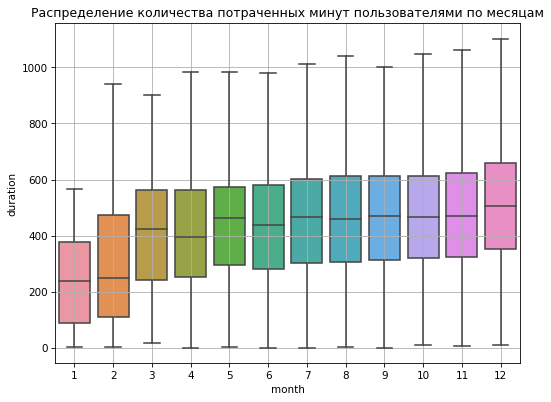

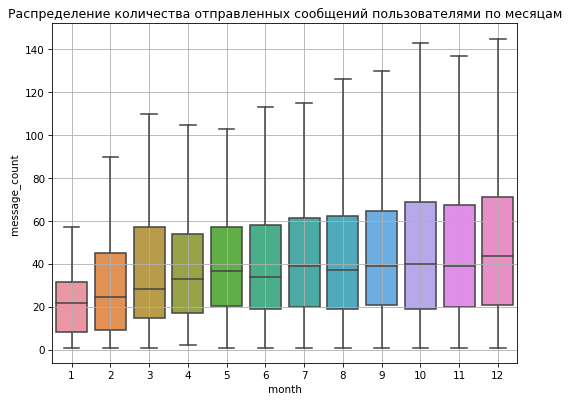

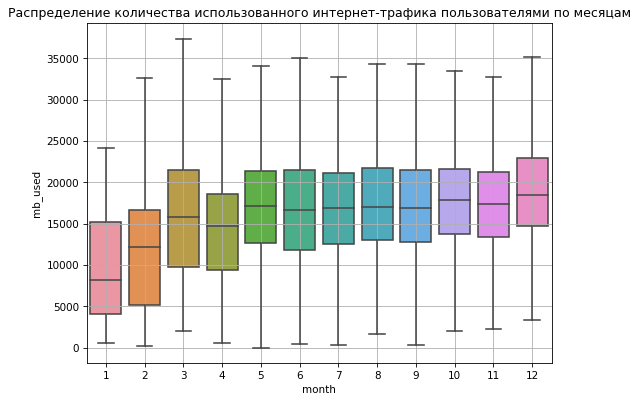

In [19]:
def plot_box(df, unit, title):
    plt.figure(figsize=(8, 6), dpi=75)
    tmp = \
    df.groupby('month', as_index=False).agg({unit:'median'})
    sns.boxplot(x='month', y= unit, data=df, showfliers=False, order=tmp['month'].to_list())
    plt.title(title)
    plt.grid(True)
    plt.show()    
plot_box(db_all, 'duration', 'Распределение количества потраченных минут пользователями по месяцам')
plot_box(db_all, 'message_count', 'Распределение количества отправленных сообщений пользователями по месяцам')
plot_box(db_all, 'mb_used', 'Распределение количества использованного интернет-трафика пользователями по месяцам')

 Видим, что пользователи более активны в декабре. Это может быть связано с Новогодними праздниками


#### Нарисуем распределение среднего количества потраченных минут, отправленных сообщений и использованного интернет-трафика пользователями по месяцам для каждого тарифа

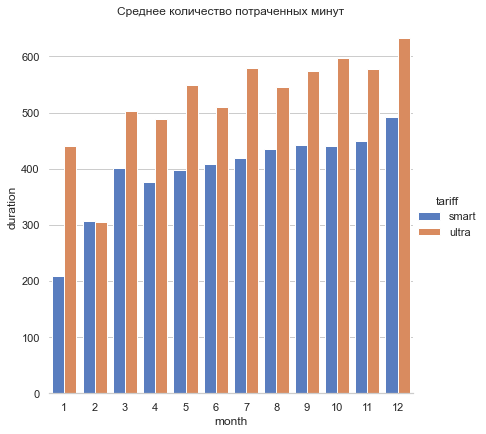

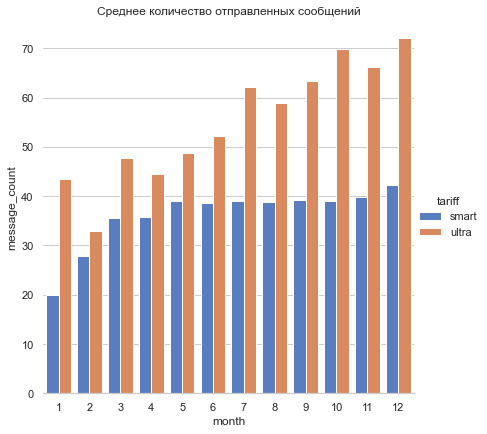

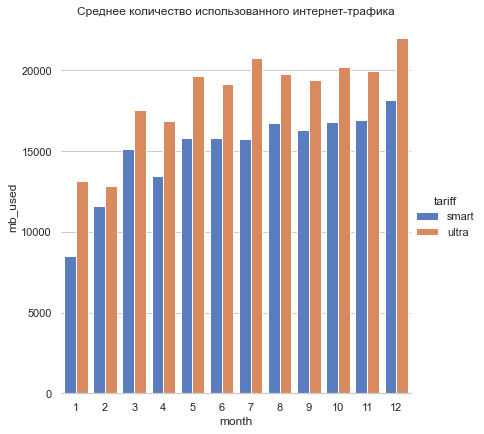

In [20]:
sns.set(style="whitegrid")
def plot_distr(df, column_name, title_name):
    g = sns.catplot(x="month", y=column_name, hue="tariff", data=df, height=6, kind="bar", palette="muted")
    g.despine(left=True)
    g.set(title=title_name)

    
tariff_mean = db_all.groupby(['tariff','month'])['duration','message_count', 'mb_used'].agg('mean').reset_index()
plot_distr(tariff_mean, 'duration', 'Среднее количество потраченных минут')
plot_distr(tariff_mean, 'message_count', 'Среднее количество отправленных сообщений')
plot_distr(tariff_mean, 'mb_used', 'Среднее количество использованного интернет-трафика')
    



#### Нарисуем распределение дисперсии потраченных минут, отправленных сообщений и интернет-трафика пользователями по месяцам для каждого тарифа

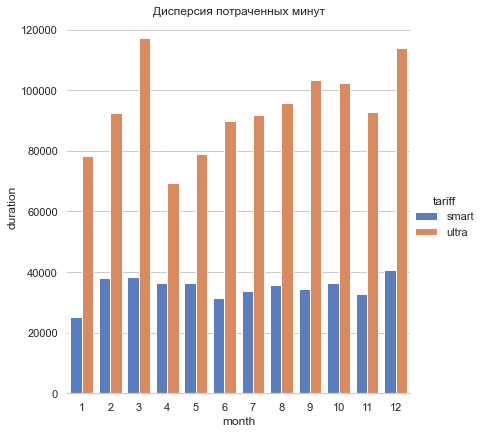

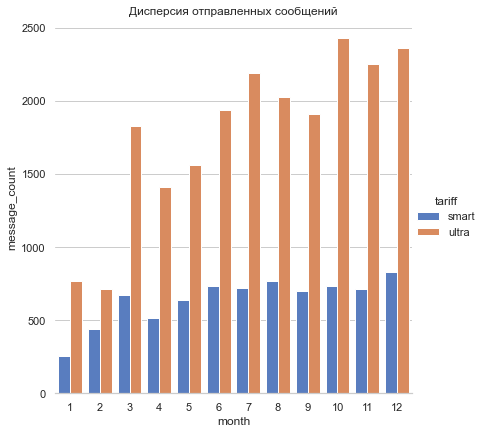

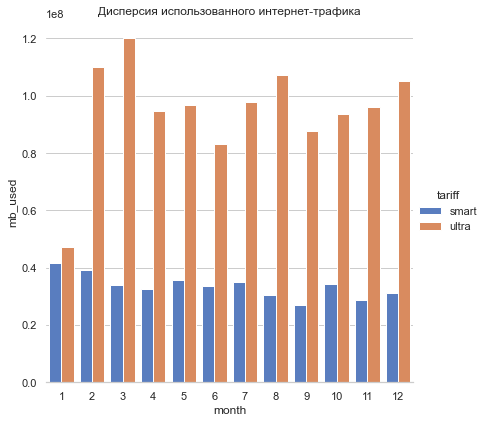

In [21]:
tariff_var_month = db_all.groupby(['tariff','month'])['duration','message_count', 'mb_used'].agg('var', ddof=1).reset_index()
plot_distr(tariff_var_month, 'duration', 'Дисперсия потраченных минут')
plot_distr(tariff_var_month, 'message_count', 'Дисперсия отправленных сообщений')
plot_distr(tariff_var_month, 'mb_used', 'Дисперсия использованного интернет-трафика')

#### Нарисуем распределение стандартного отклонения количества потраченных минут, отправленных сообщений и интернет-трафика пользователями по месяцам для каждого тарифа

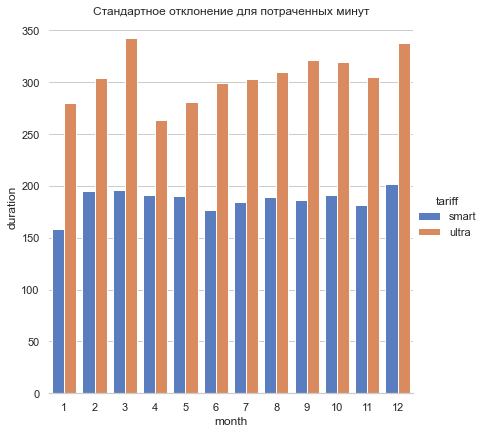

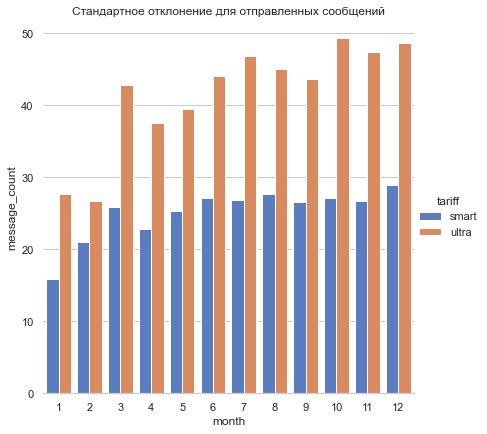

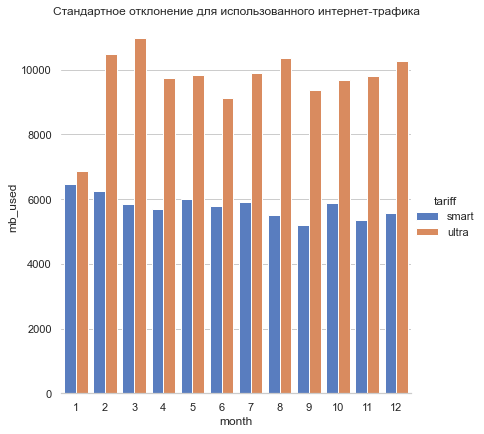

In [22]:
tariff_std_month = db_all.groupby(['tariff','month'])['duration','message_count', 'mb_used'].agg('std', ddof=1).reset_index()

plot_distr(tariff_std_month, 'duration', 'Стандартное отклонение для потраченных минут')
plot_distr(tariff_std_month, 'message_count', 'Стандартное отклонение для отправленных сообщений')
plot_distr(tariff_std_month, 'mb_used', 'Стандартное отклонение для использованного интернет-трафика')

#### Найдем стандартное отклонение и дисперсию потраченных минут, отправленных сообщений и интернет-трафика пользователями  для каждого тарифа за весь период

In [23]:
tariff_var = db_all.groupby(['tariff'])['duration','message_count', 'mb_used'].agg('var', ddof=1).reset_index()
print('Дисперсия')
display(tariff_var)
tariff_std = db_all.groupby(['tariff'])['duration','message_count', 'mb_used'].agg('std', ddof=1).reset_index()
print('Стандартное отклонение')
display(tariff_std)
tariff_mean = db_all.groupby(['tariff'])['duration','message_count', 'mb_used'].agg('mean').reset_index()
print('Среднее значение')
display(tariff_mean)


# Видим, что наш датасет по двум тарифам скошен вправо(имеет положительную скошенность). 
# Это подтверждает и значения медианы и среднего(медиана < среднего)

Дисперсия


,tariff,duration,message_count,mb_used
0,smart,37577.967083,717.594201,3.446908e+07
1,ultra,99062.633405,2109.659183,9.905883e+07


Стандартное отклонение


,tariff,duration,message_count,mb_used
0,smart,193.850373,26.787949,5871.037024
1,ultra,314.742170,45.931026,9952.830482


Среднее значение


,tariff,duration,message_count,mb_used
0,smart,430.609987,38.716441,16244.472172
1,ultra,560.113565,61.161006,19688.587692


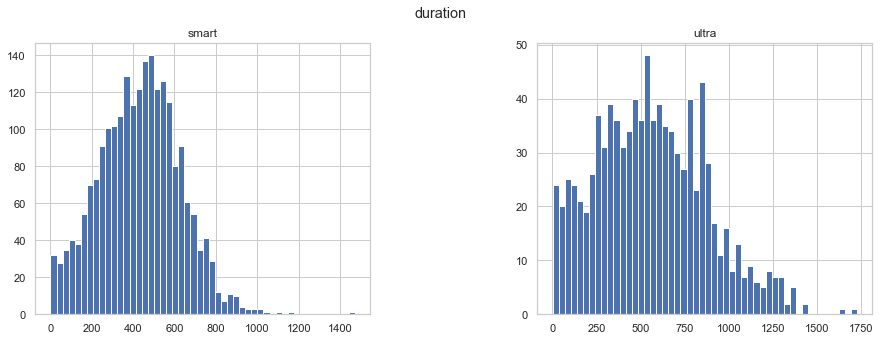

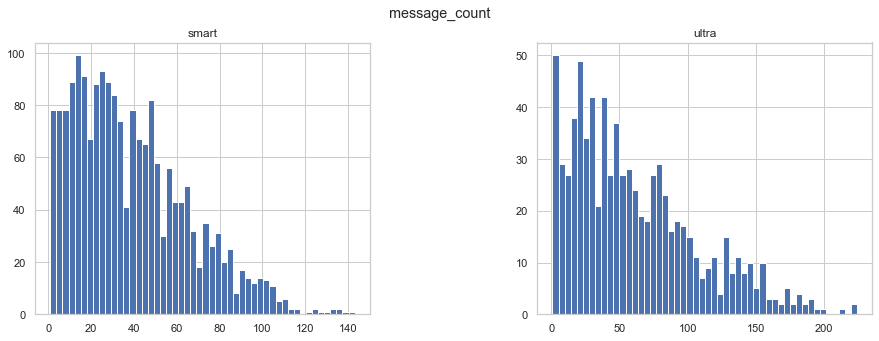

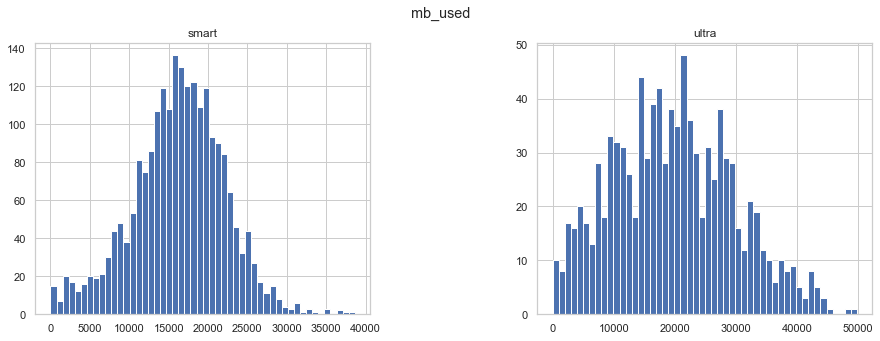

In [24]:
def plot_var(df, column_name):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (15,5))
    fig.subplots_adjust(wspace=0.5, hspace = 0.5)
    fig.suptitle(column_name)
    ax[0].hist(df.loc[df['tariff'] == 'smart', column_name], bins=50)
    ax[0].set_title('smart')
    ax[1].hist(df.loc[df['tariff'] == 'ultra', column_name], bins=50)
    ax[1].set_title('ultra')
    plt.show()
    
plot_var(db_all, 'duration')
plot_var(db_all, 'message_count')
plot_var(db_all, 'mb_used')



In [25]:
display(db_all.loc[db_all['tariff'] == 'ultra'].describe())
display(db_all.loc[db_all['tariff'] == 'smart'].describe())

,user_id,month,duration,call_count,message_count,mb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month_profit
count,985.000000,985.000000,951.000000,951.000000,795.000000,975.000000,985.0,985.0,985.0,985.0,985.0,985.0,985.0,985.000000
mean,1263.094416,8.250761,560.113565,76.016824,61.161006,19688.587692,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,2071.065990
std,140.694908,2.871762,314.742170,42.403348,45.931026,9952.830482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,378.802377
min,1000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,1950.000000
25%,1143.000000,6.000000,318.000000,43.000000,24.000000,12022.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,1950.000000
50%,1277.000000,9.000000,544.000000,75.000000,51.000000,19416.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,1950.000000
75%,1381.000000,11.000000,776.500000,105.000000,87.500000,26921.500000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,1950.000000
max,1495.000000,12.000000,1727.000000,244.000000,224.000000,49793.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,4800.000000


,user_id,month,duration,call_count,message_count,mb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month_profit
count,2229.000000,2229.000000,2223.000000,2223.000000,1922.000000,2228.000000,2229.0,2229.0,2229.0,2229.0,2229.0,2229.0,2229.0,2229.000000
mean,1246.506505,8.346792,430.609987,58.621233,38.716441,16244.472172,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,1312.602064
std,146.119496,2.920316,193.850373,25.796101,26.787949,5871.037024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,830.952970
min,1001.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,550.000000
25%,1121.000000,6.000000,292.000000,40.000000,17.000000,12673.250000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,553.000000
50%,1239.000000,9.000000,435.000000,60.000000,34.000000,16541.500000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,1075.000000
75%,1376.000000,11.000000,561.000000,76.000000,55.000000,20078.750000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,1757.000000
max,1499.000000,12.000000,1471.000000,198.000000,143.000000,38627.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,6824.000000


### Вывод
Были построены гистрограммы распределения продолжительности звонков, количества отправленных сообщений  и количества используемого интернет-трафика за весь период и помесячной разбивкой. 

Мы увидели, что пользователи наиболее активны в декабре. Это может быть связано с Новогодними праздниками,  а также годовым закрытием на работе.  

Видим, что пользователи тарифа `ultra` чаще пользуются услугами связи компании "Мегалайн", нежели чем пользователи тарифа `smart`

`Тариф ultra`

Среднее продолжительность звонков за весь период составляет  - 560.11 минуты. Со стандартным отклонением - 314.74  и медианой  - 544 минут. 

Среднее количество отправленных сообщений - 61. Стандартное отклонение - 44.71 и медиана - 52. 

Среднее количество использованных мб составляет - 19689.38. Стандартное отклонение - 9988.30. Медиана - 19447.



`Тариф smart`

Среднее продолжительность звонков за весь период составляет  - 430.60 минуты. Со стандартным отклонением - 193.85 минуты и медианой  - 435 минут. 

Среднее количество отправленных сообщений - 38. Стандартное отклонение - 26.81 и медиана - 34. 

Среднее количество использованных мб составляет - 16245.46. Стандартное отклонение - 5876.81. Медиана - 16538.




## <a id="step4">Шаг 4. Проверка гипотез </a>


### Гипотеза 1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Переформулируем гипотезу: Средния выручка генеральной совокупности по тарфиму "Ультра" равна  средней выручке генеральной совокупности "Смарт"



In [26]:
#проверим гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам
results = st.ttest_ind(
    db_all.loc[db_all['tariff'] == 'smart', 'month_profit'], 
    db_all.loc[db_all['tariff'] == 'ultra', 'month_profit'])

alpha = .05 # критический уровень статистической значимости
print('p-значение: ', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  7.444448970632563e-149
Отвергаем нулевую гипотезу


In [27]:
db_all.loc[db_all['tariff'] == 'smart', 'month_profit']

8       1350.0
9        550.0
10       550.0
11      1150.0
12      1550.0
         ...  
3208     550.0
3209     950.0
3210    1550.0
3211    1150.0
3212     950.0
Name: month_profit, Length: 2229, dtype: float64

In [28]:
db_all.loc[db_all['tariff'] == 'ultra', 'month_profit']

0       1950.0
1       1950.0
2       1950.0
3       1950.0
4       1950.0
         ...  
3204    1950.0
3205    1950.0
3206    1950.0
3207    1950.0
3213    1950.0
Name: month_profit, Length: 985, dtype: float64

Отвергаем гипотезу. Средняя выручка пользователей тарифов "Ультра" и "Смарт" различается

### Гипотеза 2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Переформулируем гипотезу: Средния выручка генеральной совокупности пользователей из Москвы равна средней выручке пользователей из других регионов

In [128]:
results_city = st.ttest_ind(
    db_all.loc[db_all['city'] == 'москва','month_profit'], 
    db_all.loc[db_all['city'] != 'москва','month_profit'])

alpha = .05 # критический уровень статистической значимости
print('p-значение: ', results_city.pvalue)
if (results_city.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.5803224505382611
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value = 0.58. Это слишком большая вероятность, чтобы делать вывод о различии между выручками пользователей из Москвы и других регионов.